# Analyzing Childhood Anemia Trends in Kenya

## Background
Anemia remains a major public health challenge, particularly among children under the age of five. It affects physical development, cognitive abilities, and overall well-being. The dataset provides key indicators on anemia prevalence in Kenya, capturing trends from national surveys conducted in 2015 and 2020. Understanding these patterns can help guide health interventions, policy decisions, and resource allocation to handle childhood anemia effectively.

## Objectives
1. Measure the prevalence of anemia among children under five.
2. Compare trends between 2015 and 2020, identifying any changes in severity.
3. Evaluate the impact of weighted and unweighted denominators.
4. Generate meaningful features like percentage-based prevalence rates for deeper analysis.
5. Provide actionable insights that can support public health strategies.

## Research Questions
1. What is the prevalence of anemia among children under five in Kenya?
2. How have anemia rates changed between 2015 and 2020?
3. Do weighted and unweighted denominators significantly impact reported anemia rates?
4. What is the distribution of anemia severity (mild, moderate, severe) among affected children?

## Data Description
The dataset used in this analysis is the "anemia_national_ken" dataset from `Data.Humdata.org`. It contains 19 records with features such as'ISO3','DataId','Indicator','Value','Precision','DHS_CountryCode','CountryName','SurveyYear','SurveyId','IndicatorId','IndicatorOrder', 'IsTotal', 'IsPreferred','SurveyType', 'DenominatorWeighted',and 'DenominatorUnweighted'. Missing values, duplicates, and outliers were addressed as Feature engineering metrics like ratios, and percentages features were added in the dataset.

## Methodology
The analysis involves the following:

1. **Data Cleaning:** Handling missing values using mode and median imputation. Standardizing categorical variables for consistency.

2. **Exploratory Data Analysis (EDA):** Visualizing data through box plots, scatter plots, histograms, and heatmaps. Analyzing correlations between variables using statistical techniques. Time-based trend analysis to examine anemia prevalence over survey years.

3. **Feature Engineering:** Creating percentage-based features for anemia prevalence. Calculating ratios for severity comparisons (moderate-to-severe anemia).

## Significance
Supports decision-makers in identifying priority areas for intervention. Helps researchers examine how anemia prevalence shifts over time. Evaluates differences between weighted and unweighted data to ensure accuracy in national estimates. Facilitates targeted public health efforts in Kenya to reduce childhood anemia prevalence.

## NON-TECHNICAL 

1. **TABLEAU:[Link](https://public.tableau.com/app/profile/ian.moire/viz/KENYACHILDHEALTHANEMIAINSIGHTS/KENYACHILDHEALTHANEMIAINSIGHTS)**
2. **PRESENTATION:[Link](https://docs.google.com/presentation/d/13A2BUqxmFqjX_2VwJZNKwf7GUzNIGoylNEJQbn8A35o/edit?usp=sharing)**

## Use the Required Libraries

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Open the Dataset

In [74]:
# Open the required dataset
df = pd.read_csv('/Users/mac/Documents/DATA.HUMDATA.ORG/anemia_national_ken.csv')
print(df)

             ISO3    DataId                                        Indicator  \
0   #country+code  #meta+id                                  #indicator+name   
1             KEN     44958                         Children with any anemia   
2             KEN     44961                        Children with mild anemia   
3             KEN     44959                    Children with moderate anemia   
4             KEN     44960                      Children with severe anemia   
5             KEN     44962                   Number of children under age 5   
6             KEN    195494      Number of children under age 5 (unweighted)   
7             KEN    160968     Children with hemoglobin lower than 8.0 g/dl   
8             KEN    160982               Number of children age 6-59 months   
9             KEN    160969  Number of children age 6-59 months (unweighted)   
10            KEN    165149                         Children with any anemia   
11            KEN    165161             

In [75]:
# Display the dataset
df

,ISO3,DataId,Indicator,Value,Precision,DHS_CountryCode,CountryName,SurveyYear,SurveyId,IndicatorId,...,IsPreferred,SDRID,RegionId,SurveyYearLabel,SurveyType,DenominatorWeighted,DenominatorUnweighted,CILow,CIHigh,LevelRank
0,#country+code,#meta+id,#indicator+name,#indicator+value+num,#indicator+precision,NaN,#country+name,#date+year,#survey+id,#indicator+code,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,KEN,44958,Children with any anemia,36.3,1,KE,Kenya,2015,KE2015MIS,CN_ANMC_C_ANY,...,1.0,CNANMCCANY,NaN,2015.0,MIS,3077.0,3426.0,NaN,NaN,NaN
2,KEN,44961,Children with mild anemia,20.1,1,KE,Kenya,2015,KE2015MIS,CN_ANMC_C_MLD,...,1.0,CNANMCCMLD,NaN,2015.0,MIS,3077.0,3426.0,NaN,NaN,NaN
3,KEN,44959,Children with moderate anemia,15.5,1,KE,Kenya,2015,KE2015MIS,CN_ANMC_C_MOD,...,1.0,CNANMCCMOD,NaN,2015.0,MIS,3077.0,3426.0,NaN,NaN,NaN
4,KEN,44960,Children with severe anemia,0.7,1,KE,Kenya,2015,KE2015MIS,CN_ANMC_C_SEV,...,1.0,CNANMCCSEV,NaN,2015.0,MIS,3077.0,3426.0,NaN,NaN,NaN
5,KEN,44962,Number of children under age 5,3077,0,KE,Kenya,2015,KE2015MIS,CN_ANMC_C_NUM,...,1.0,CNANMCCNUM,NaN,2015.0,MIS,NaN,3426.0,NaN,NaN,NaN
6,KEN,195494,Number of children under age 5 (unweighted),3426,0,KE,Kenya,2015,KE2015MIS,CN_ANMC_C_UNW,...,1.0,CNANMCCUNW,NaN,2015.0,MIS,3077.0,NaN,NaN,NaN,NaN
7,KEN,160968,Children with hemoglobin lower than 8.0 g/dl,2.2,1,KE,Kenya,2015,KE2015MIS,ML_HEMO_C_HL8,...,1.0,MLHEMOCHL8,NaN,2015.0,MIS,3077.0,3426.0,NaN,NaN,NaN
8,KEN,160982,Number of children age 6-59 months,3077,0,KE,Kenya,2015,KE2015MIS,ML_HEMO_C_NUM,...,1.0,MLHEMOCNUM,NaN,2015.0,MIS,NaN,3426.0,NaN,NaN,NaN
9,KEN,160969,Number of children age 6-59 months (unweighted),3426,0,KE,Kenya,2015,KE2015MIS,ML_HEMO_C_UNW,...,1.0,MLHEMOCUNW,NaN,2015.0,MIS,3077.0,NaN,NaN,NaN,NaN


In [76]:
# Determine the number of rows and columns
df.shape

(19, 29)

In [77]:
# Check the data types of each column
df.dtypes

ISO3                       object
DataId                     object
Indicator                  object
Value                      object
Precision                  object
DHS_CountryCode            object
CountryName                object
SurveyYear                 object
SurveyId                   object
IndicatorId                object
IndicatorOrder            float64
IndicatorType              object
CharacteristicId          float64
CharacteristicOrder       float64
CharacteristicCategory     object
CharacteristicLabel        object
ByVariableId               object
ByVariableLabel            object
IsTotal                   float64
IsPreferred               float64
SDRID                      object
RegionId                  float64
SurveyYearLabel           float64
SurveyType                 object
DenominatorWeighted       float64
DenominatorUnweighted     float64
CILow                     float64
CIHigh                    float64
LevelRank                 float64
dtype: object

In [78]:
# Get the summary statistics of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ISO3                    19 non-null     object 
 1   DataId                  19 non-null     object 
 2   Indicator               19 non-null     object 
 3   Value                   19 non-null     object 
 4   Precision               19 non-null     object 
 5   DHS_CountryCode         18 non-null     object 
 6   CountryName             19 non-null     object 
 7   SurveyYear              19 non-null     object 
 8   SurveyId                19 non-null     object 
 9   IndicatorId             19 non-null     object 
 10  IndicatorOrder          18 non-null     float64
 11  IndicatorType           18 non-null     object 
 12  CharacteristicId        18 non-null     float64
 13  CharacteristicOrder     18 non-null     float64
 14  CharacteristicCategory  18 non-null     obje

## Handling Duplicates

In [79]:
# Remove duplicates that are in the dataset
df.drop_duplicates()

,ISO3,DataId,Indicator,Value,Precision,DHS_CountryCode,CountryName,SurveyYear,SurveyId,IndicatorId,...,IsPreferred,SDRID,RegionId,SurveyYearLabel,SurveyType,DenominatorWeighted,DenominatorUnweighted,CILow,CIHigh,LevelRank
0,#country+code,#meta+id,#indicator+name,#indicator+value+num,#indicator+precision,NaN,#country+name,#date+year,#survey+id,#indicator+code,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,KEN,44958,Children with any anemia,36.3,1,KE,Kenya,2015,KE2015MIS,CN_ANMC_C_ANY,...,1.0,CNANMCCANY,NaN,2015.0,MIS,3077.0,3426.0,NaN,NaN,NaN
2,KEN,44961,Children with mild anemia,20.1,1,KE,Kenya,2015,KE2015MIS,CN_ANMC_C_MLD,...,1.0,CNANMCCMLD,NaN,2015.0,MIS,3077.0,3426.0,NaN,NaN,NaN
3,KEN,44959,Children with moderate anemia,15.5,1,KE,Kenya,2015,KE2015MIS,CN_ANMC_C_MOD,...,1.0,CNANMCCMOD,NaN,2015.0,MIS,3077.0,3426.0,NaN,NaN,NaN
4,KEN,44960,Children with severe anemia,0.7,1,KE,Kenya,2015,KE2015MIS,CN_ANMC_C_SEV,...,1.0,CNANMCCSEV,NaN,2015.0,MIS,3077.0,3426.0,NaN,NaN,NaN
5,KEN,44962,Number of children under age 5,3077,0,KE,Kenya,2015,KE2015MIS,CN_ANMC_C_NUM,...,1.0,CNANMCCNUM,NaN,2015.0,MIS,NaN,3426.0,NaN,NaN,NaN
6,KEN,195494,Number of children under age 5 (unweighted),3426,0,KE,Kenya,2015,KE2015MIS,CN_ANMC_C_UNW,...,1.0,CNANMCCUNW,NaN,2015.0,MIS,3077.0,NaN,NaN,NaN,NaN
7,KEN,160968,Children with hemoglobin lower than 8.0 g/dl,2.2,1,KE,Kenya,2015,KE2015MIS,ML_HEMO_C_HL8,...,1.0,MLHEMOCHL8,NaN,2015.0,MIS,3077.0,3426.0,NaN,NaN,NaN
8,KEN,160982,Number of children age 6-59 months,3077,0,KE,Kenya,2015,KE2015MIS,ML_HEMO_C_NUM,...,1.0,MLHEMOCNUM,NaN,2015.0,MIS,NaN,3426.0,NaN,NaN,NaN
9,KEN,160969,Number of children age 6-59 months (unweighted),3426,0,KE,Kenya,2015,KE2015MIS,ML_HEMO_C_UNW,...,1.0,MLHEMOCUNW,NaN,2015.0,MIS,3077.0,NaN,NaN,NaN,NaN


## Handling Missing Values

In [80]:
# Check for missing values
df.isnull().sum()

ISO3                       0
DataId                     0
Indicator                  0
Value                      0
Precision                  0
DHS_CountryCode            1
CountryName                0
SurveyYear                 0
SurveyId                   0
IndicatorId                0
IndicatorOrder             1
IndicatorType              1
CharacteristicId           1
CharacteristicOrder        1
CharacteristicCategory     1
CharacteristicLabel        1
ByVariableId               0
ByVariableLabel           18
IsTotal                    1
IsPreferred                1
SDRID                      1
RegionId                  19
SurveyYearLabel            1
SurveyType                 1
DenominatorWeighted        5
DenominatorUnweighted      5
CILow                     19
CIHigh                    19
LevelRank                 19
dtype: int64

In [81]:
# Check for missing values using boolean
df.isna()

,ISO3,DataId,Indicator,Value,Precision,DHS_CountryCode,CountryName,SurveyYear,SurveyId,IndicatorId,...,IsPreferred,SDRID,RegionId,SurveyYearLabel,SurveyType,DenominatorWeighted,DenominatorUnweighted,CILow,CIHigh,LevelRank
0,False,False,False,False,False,True,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,True,True
5,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,True,True,True
6,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,True,True,True,True
7,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,True,True
8,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,True,True,True
9,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,True,True,True,True


In [82]:
# Drop the row that contains text
df = df[df['Value'].apply(lambda x: str(x).replace('.', '').isdigit())]

In [83]:
# Fill the missing values of numerical columns
df = df.copy() # Use 'df.copy() due to modifying the original dataset
df['Value'].fillna(df['Value'].median(), inplace=True)
df['DenominatorWeighted'].fillna(df['DenominatorWeighted'].mean(), inplace=True)

df.isna().sum()

ISO3                       0
DataId                     0
Indicator                  0
Value                      0
Precision                  0
DHS_CountryCode            0
CountryName                0
SurveyYear                 0
SurveyId                   0
IndicatorId                0
IndicatorOrder             0
IndicatorType              0
CharacteristicId           0
CharacteristicOrder        0
CharacteristicCategory     0
CharacteristicLabel        0
ByVariableId               0
ByVariableLabel           18
IsTotal                    0
IsPreferred                0
SDRID                      0
RegionId                  18
SurveyYearLabel            0
SurveyType                 0
DenominatorWeighted        0
DenominatorUnweighted      4
CILow                     18
CIHigh                    18
LevelRank                 18
dtype: int64

In [84]:
# Fill the missing values of categorical columns
df['RegionId'].fillna(method='ffill', inplace=True)
df['ByVariableLabel'].fillna(method='ffill', inplace=True)

df['CIHigh'].fillna(df['CIHigh'].mode(), inplace=True)
df['CILow'].fillna(df['CILow'].mode(), inplace=True)
df['LevelRank'].fillna(df['LevelRank'].mode(), inplace=True)

df.dropna(subset=['DenominatorUnweighted'], inplace=True)

In [85]:
# Recheck to see if all missing values were handled
df.isna().sum()

ISO3                       0
DataId                     0
Indicator                  0
Value                      0
Precision                  0
DHS_CountryCode            0
CountryName                0
SurveyYear                 0
SurveyId                   0
IndicatorId                0
IndicatorOrder             0
IndicatorType              0
CharacteristicId           0
CharacteristicOrder        0
CharacteristicCategory     0
CharacteristicLabel        0
ByVariableId               0
ByVariableLabel           14
IsTotal                    0
IsPreferred                0
SDRID                      0
RegionId                  14
SurveyYearLabel            0
SurveyType                 0
DenominatorWeighted        0
DenominatorUnweighted      0
CILow                     14
CIHigh                    14
LevelRank                 14
dtype: int64

In [86]:
# Fill the missing values 'RegionId', 'ByVariableLabel', 'CILow', 'CIHigh', 'LevelRank' with a default value
columns_to_fill = ['RegionId', 'ByVariableLabel', 'CILow', 'CIHigh', 'LevelRank']

for col in columns_to_fill:
    mode_value = df[col].mode()
    df[col].fillna(mode_value[0] if not mode_value.empty else 'Unknown', inplace=True)


In [87]:
# Recheck to see if missing values were handled
df.isna().sum()

ISO3                      0
DataId                    0
Indicator                 0
Value                     0
Precision                 0
DHS_CountryCode           0
CountryName               0
SurveyYear                0
SurveyId                  0
IndicatorId               0
IndicatorOrder            0
IndicatorType             0
CharacteristicId          0
CharacteristicOrder       0
CharacteristicCategory    0
CharacteristicLabel       0
ByVariableId              0
ByVariableLabel           0
IsTotal                   0
IsPreferred               0
SDRID                     0
RegionId                  0
SurveyYearLabel           0
SurveyType                0
DenominatorWeighted       0
DenominatorUnweighted     0
CILow                     0
CIHigh                    0
LevelRank                 0
dtype: int64

## Handling Outliers

In [88]:
# Identify numerical columns and assign them to numerical_cols
numerical_cols = df.select_dtypes(include=['number']).columns
print(numerical_cols)  # See all numeric columns

Index(['IndicatorOrder', 'CharacteristicId', 'CharacteristicOrder', 'IsTotal',
       'IsPreferred', 'SurveyYearLabel', 'DenominatorWeighted',
       'DenominatorUnweighted'],
      dtype='object')


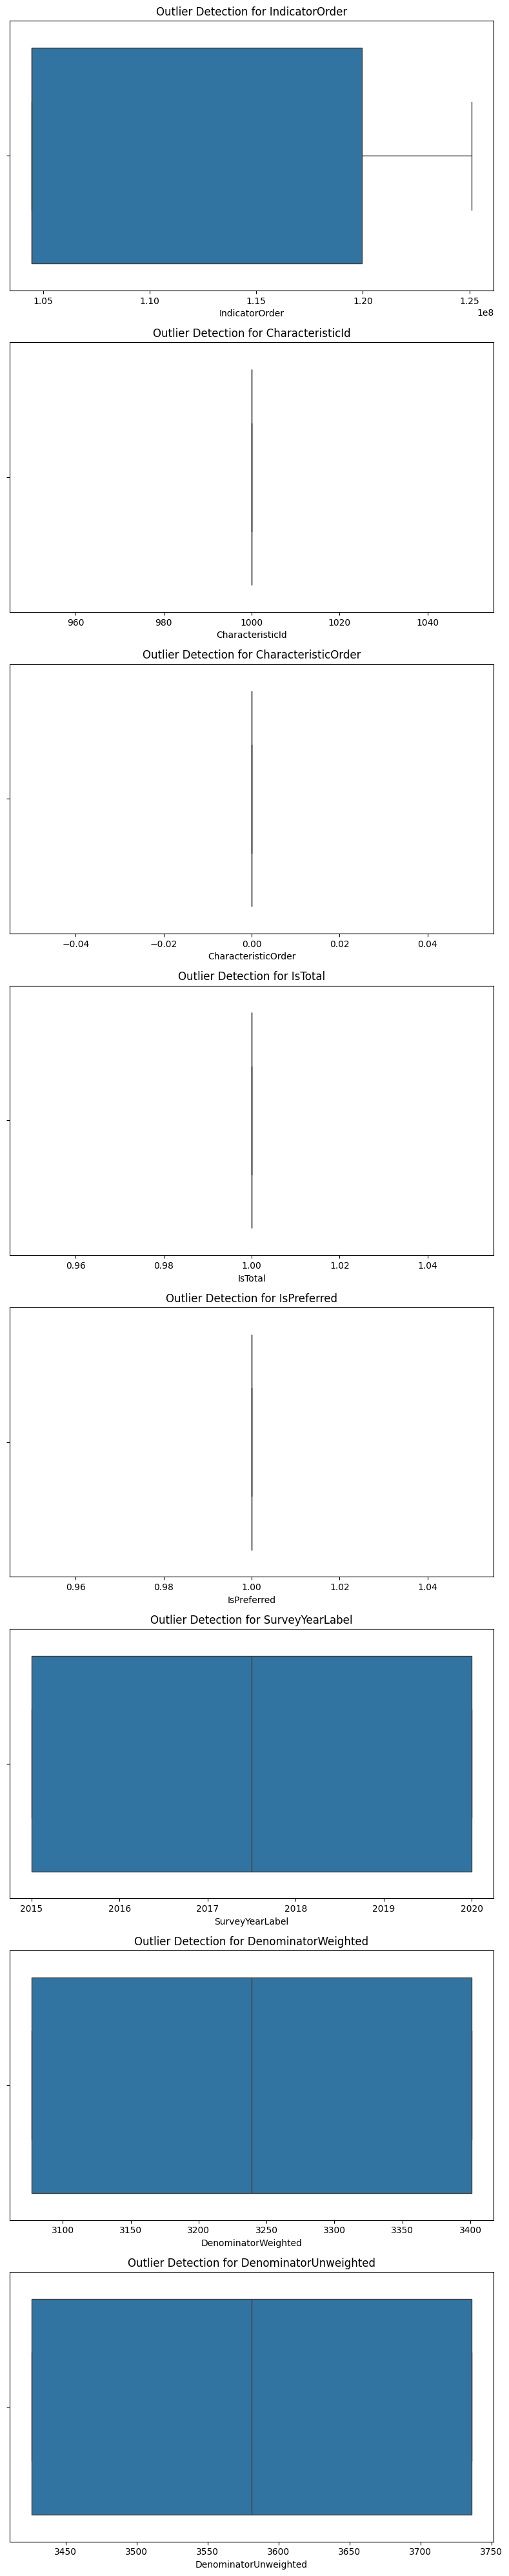

In [89]:
# Create subplots for each numerical column
fig, axes = plt.subplots(len(numerical_cols), 1, figsize=(8, 5 * len(numerical_cols)))

# Loop through numeric columns and plot box plots
for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Outlier Detection for {col}')

plt.tight_layout()
plt.show()


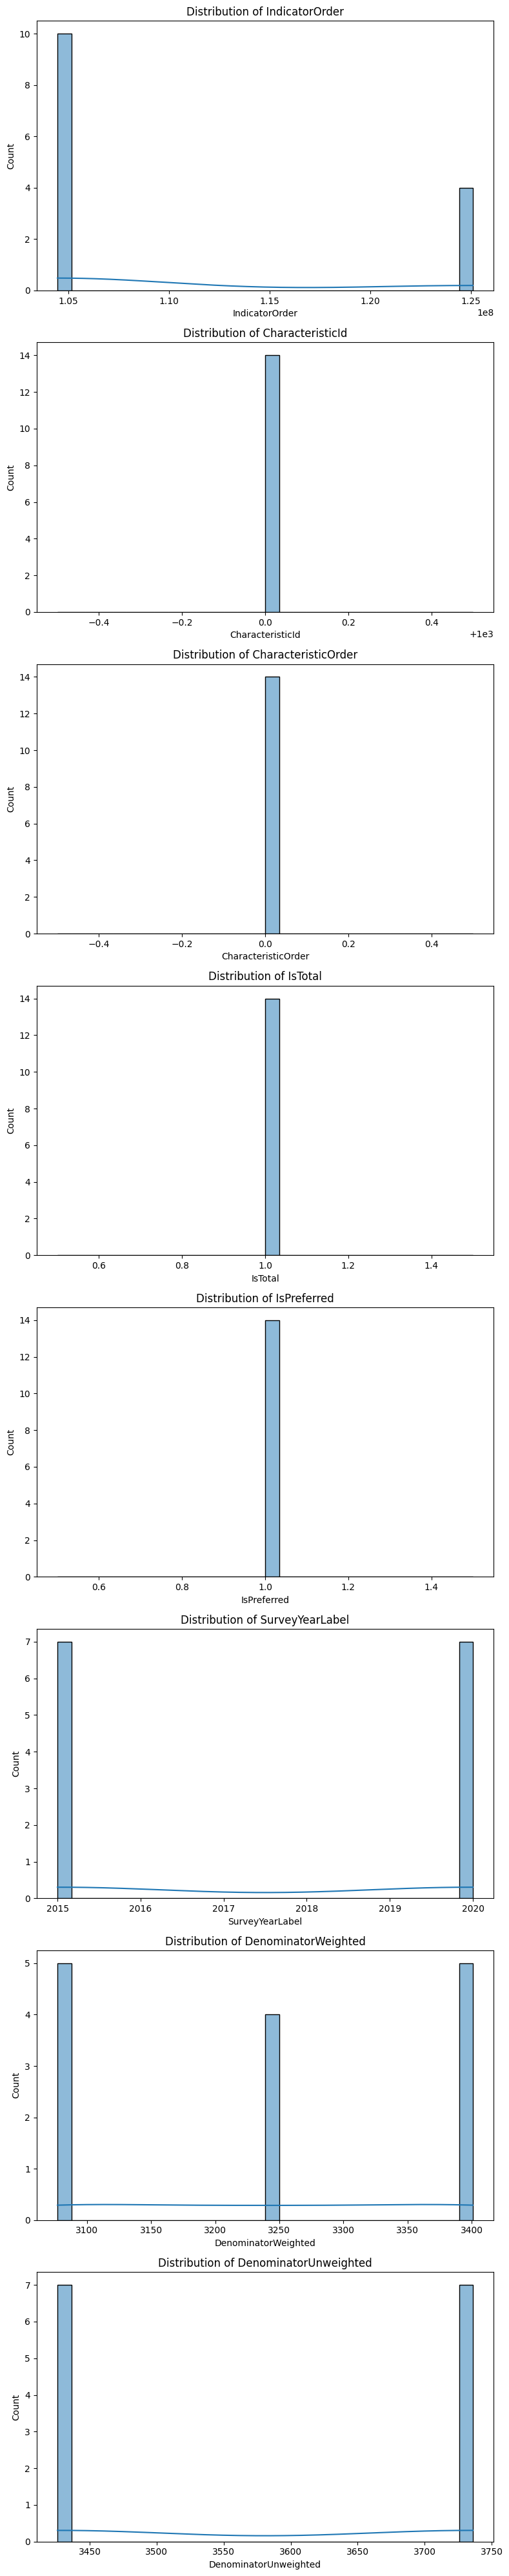

In [90]:
# Create histogram for numerical cols to check for skewness
fig, axes = plt.subplots(len(numerical_cols), 1, figsize=(8, 5 * len(numerical_cols)))

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

### ***NOTE: Seems the dataset has no outliers.***

## Perform Exploratory Data Analysis

In [91]:
df.describe()

,IndicatorOrder,CharacteristicId,CharacteristicOrder,IsTotal,IsPreferred,SurveyYearLabel,DenominatorWeighted,DenominatorUnweighted
count,1.400000e+01,14.0,14.0,14.0,14.0,14.000000,14.000000,14.000000
mean,1.103632e+08,1000.0,0.0,1.0,1.0,2017.500000,3239.000000,3581.000000
std,9.676174e+06,0.0,0.0,0.0,0.0,2.594373,142.083399,160.851102
min,1.044660e+08,1000.0,0.0,1.0,1.0,2015.000000,3077.000000,3426.000000
25%,1.044660e+08,1000.0,0.0,1.0,1.0,2015.000000,3077.000000,3426.000000
50%,1.044660e+08,1000.0,0.0,1.0,1.0,2017.500000,3239.000000,3581.000000
75%,1.199460e+08,1000.0,0.0,1.0,1.0,2020.000000,3401.000000,3736.000000
max,1.251060e+08,1000.0,0.0,1.0,1.0,2020.000000,3401.000000,3736.000000


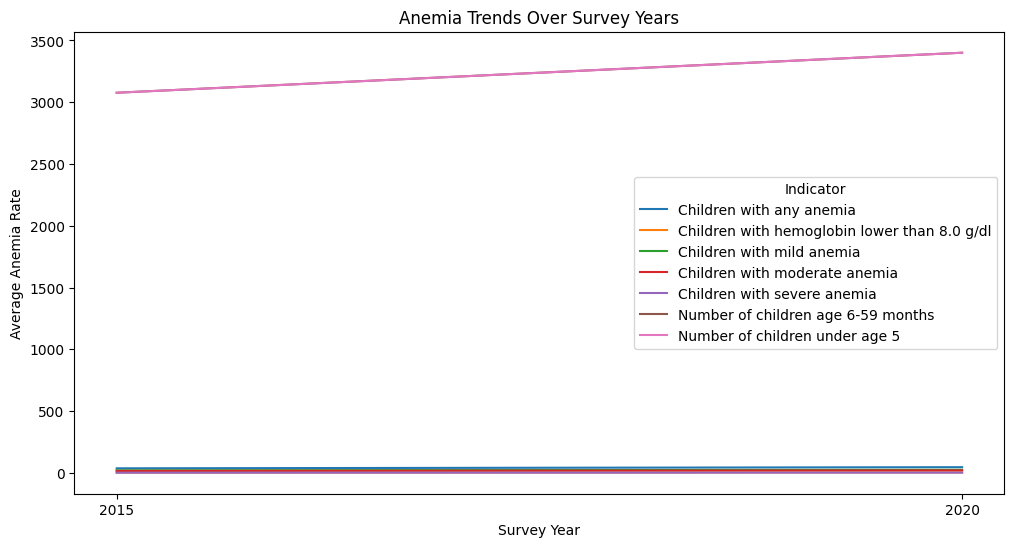

In [92]:
# Group data by SurveyYear and Indicator
df_grouped = df.groupby(['SurveyYear', 'Indicator'])['Value'].mean().reset_index()

# Plot trend lines
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_grouped, x='SurveyYear', y='Value', hue='Indicator')
plt.title("Anemia Trends Over Survey Years")
plt.xlabel("Survey Year")
plt.ylabel("Average Anemia Rate")
plt.show()

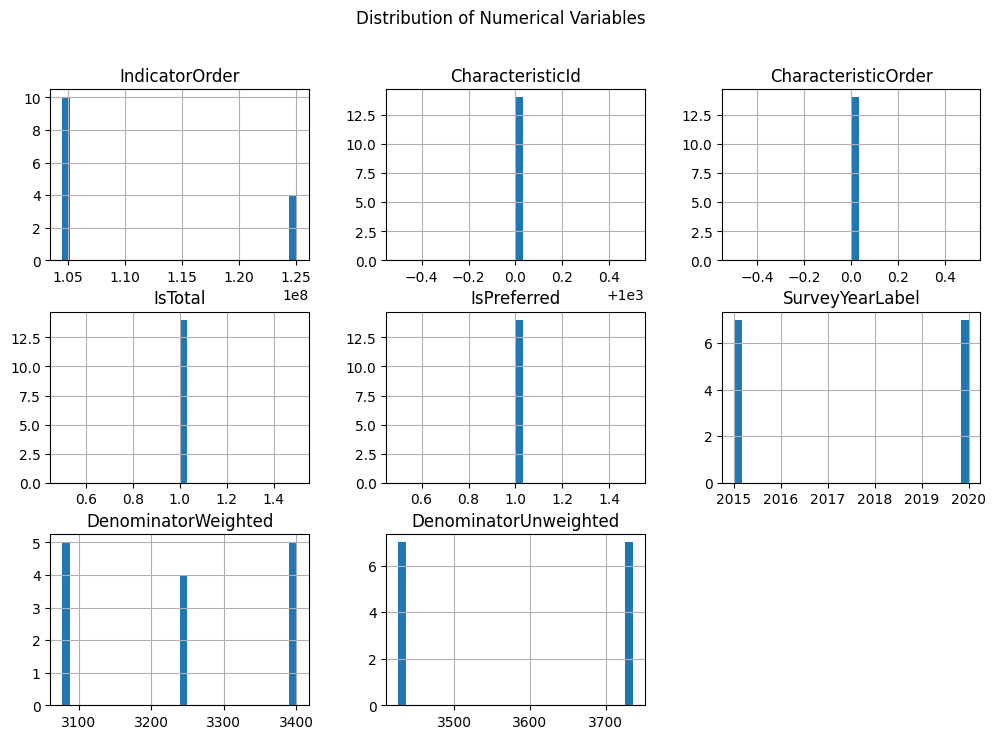

In [93]:
# Histogram disrtribution of key varibles
numerical_cols = df.select_dtypes(include=['number']).columns

# Histograms for all numeric columns
df[numerical_cols].hist(figsize=(12, 8), bins=30)
plt.suptitle("Distribution of Numerical Variables")
plt.show()

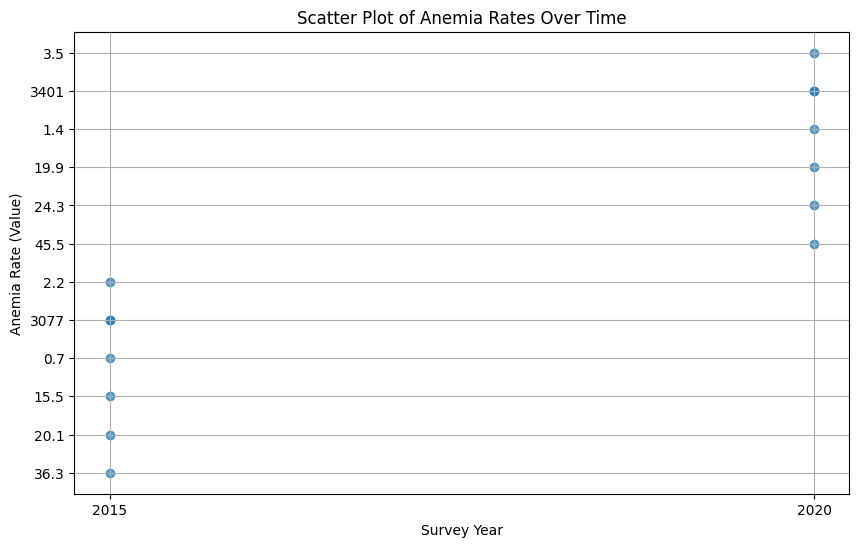

In [94]:
# Scatter plot of Value by Survey Year
plt.figure(figsize=(10, 6))
plt.scatter(df['SurveyYear'], df['Value'], alpha=0.7)
plt.xlabel("Survey Year")
plt.ylabel("Anemia Rate (Value)")
plt.title("Scatter Plot of Anemia Rates Over Time")
plt.grid()
plt.show()

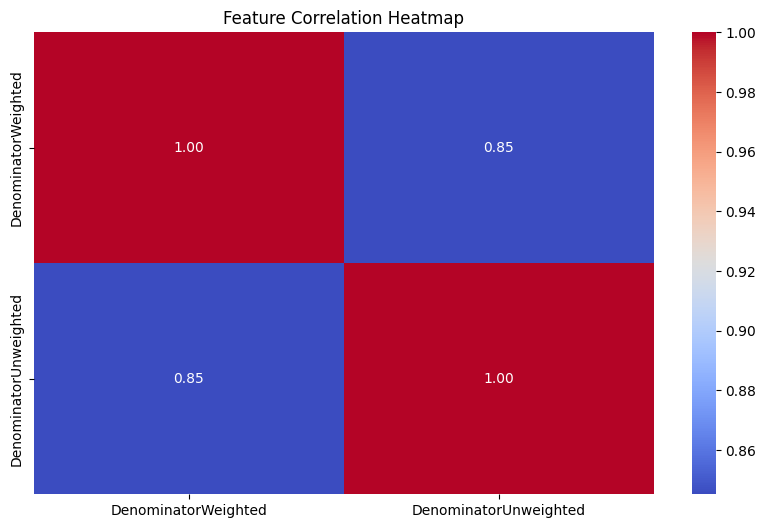

In [95]:
# Compute correlation matrix
corr_matrix = df[['Value', 'DenominatorWeighted', 'DenominatorUnweighted', 'CILow', 'CIHigh'
                 ]].corr(numeric_only=True)
# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

## Feature Engineering

### > Create Percentages and Ratios

In [96]:
# Create DenominatorWeighted, DenominatorUnweighted Ratios
df['Weighted_Unweighted_Ratio'] = df['DenominatorWeighted'] / df['DenominatorUnweighted']
df['Weighted_Unweighted_Ratio']

1     0.898132
2     0.898132
3     0.898132
4     0.898132
5     0.945417
7     0.898132
8     0.945417
10    0.910332
11    0.910332
12    0.910332
13    0.910332
14    0.866970
16    0.910332
17    0.866970
Name: Weighted_Unweighted_Ratio, dtype: float64

In [97]:
# create DenominatorWeighted and DenominatorUnweighted Percentages
df['Weighted_Percentage'] = df['DenominatorWeighted'] / df['DenominatorUnweighted'].sum() * 100
df['Weighted_Percentage']
df['Unweighted_Percentage'] = df['DenominatorUnweighted'] / df['DenominatorUnweighted'].sum() * 100
df['Unweighted_Percentage']

1     6.833686
2     6.833686
3     6.833686
4     6.833686
5     6.833686
7     6.833686
8     6.833686
10    7.452029
11    7.452029
12    7.452029
13    7.452029
14    7.452029
16    7.452029
17    7.452029
Name: Unweighted_Percentage, dtype: float64

## Conclusion

## Summary of Key Findings
1. Anemia prevalence rates show variation between 2015 and 2020, with a notable increase in moderate cases.
2. Weighted denominators adjust values slightly, affecting some calculated prevalence rates.
3. Moderate anemia is more prevalent than severe anemia, as observed in the computed severity ratio.
4. No extreme outliers detected, indicating data consistency across survey years.

## Implications
Develop Public Health Strategies to provide evidence for intervention efforts focused on moderate anemia reduction.
The results of Resource Allocation can guide targeted strategies for anemia prevention and treatment in children under five.
Long-Term Monitoring supports early detection of anemia progression.

## Limitations
Only includes survey data from Kenya, limiting broader generalization. Missing values were imputed, but assumptions may affect precision.
Dataset lacks detailed geographic segmentation for deeper regional comparisons.

## Future Work
Expand geographic scope to analyze anemia trends across multiple countries. Investigate socioeconomic factors influencing anemia prevalence. Enhance predictive modeling to forecast future anemia trends using time series analysis. Refine feature engineering to explore additional anemia-related indicators.

## References

# ***data.Humdata.org***

**(https://data.humdata.org/dataset/dhs-data-for-kenya?force_layout=desktop)**

In [98]:
# Save the cleaned data to a csv file with the full path
output_file_path = 'cleaned_anemia_national_ken.csv'
df.to_csv(output_file_path, index=False)

print("Data saved successfully as cleaned_anemia_national_ken.csv.")

Data saved successfully as cleaned_anemia_national_ken.csv.
